**ML ASSIGNMENT 3**

**Name - Pankaj Ahakey**

a) Implementing Linear Regression

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv, norm
import matplotlib.pyplot as plt

Generating 50 random data points and adding noise to y

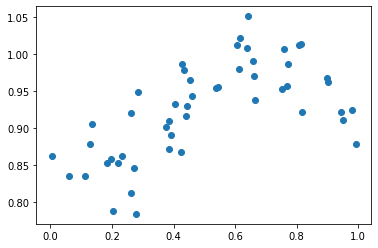

In [2]:
input=np.random.random((50,1))
noiseless=np.sin(1+np.square(input))
noise=np.random.normal(0,0.032,size=(50,1))
noisefull=noiseless+noise
train=40
plt.scatter(input, noisefull)
plt.show()

In [3]:
def normalize(X):
    mu = X.mean(0)
    std = X.std(0)
    return (X - mu) / std, mu, std


def add_bias_column(X):
    ones = np.ones(X.shape[0]).reshape(X.shape[0], 1)
    return np.concatenate((ones, X), 1)


def normal_equation(X, y):
    w = inv(X.T.dot(X)).dot(X.T).dot(y)
    return w


def compute_error(X, y, w):
    return (y - X.dot(w)).T.dot(y - X.dot(w))

----------------------------------------------------------------------
Normal Equation Model:
 [[0.85171801]
 [0.14436854]] 
 ----------------------------------------------------------------------
[0.98926154] [0.95272513]
[0.93015011] [0.54327696]
[0.9697867] [0.81782839]
[0.87133645] [0.13589141]
[0.96859808] [0.8095952]
[0.91326884] [0.4263452]
[0.86804225] [0.11307343]
[0.91034873] [0.40611844]
[0.9604829] [0.75338361]
[0.94017891] [0.61274361]
[0.90848305] [0.39319537]
[0.88963209] [0.26262012]
[0.91738823] [0.45487902]
[0.92955019] [0.53912152]
[0.98828159] [0.94593728]
[0.98173129] [0.90056521]
[0.90603676] [0.37625065]
[0.96281105] [0.76951005]
[0.91439002] [0.43411129]
[0.90717308] [0.38412159]
[0.99515611] [0.99355513]
[0.87010723] [0.12737696]
[0.88343171] [0.21967187]
[0.90747971] [0.38624553]
[0.88511873] [0.23135737]
[0.9931151] [0.97941763]
[0.89289257] [0.28520452]
[0.85227036] [0.00382599]
[0.94416805] [0.64037528]
[0.94688395] [0.65918751]
[0.96137898] [0.75959053]
[0

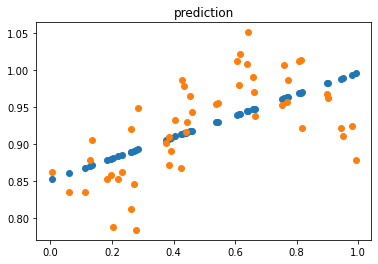

In [4]:
if __name__ == '__main__':

    X = input
    y = noisefull
    X = add_bias_column(X)
    ne_w = normal_equation(X, y)
    print('-' * 70)
    print('Normal Equation Model:\n', ne_w, '\n', '-' * 70)
    predict= ne_w[1] * input + ne_w[0]
    for a,b in zip(predict,input):
        print(a ,b)

    plt.title("prediction")
    plt.scatter(input, predict)
    plt.scatter(input, noisefull)

    plt.show()

**b) Implementing Polynomial Regression**

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def getPoweredX(deg, X_t):
    X_pow = X_t.copy()
    for i in range(2, deg + 1):
        powmat = (X_t[:, 1] ** i).reshape(X_pow.shape[0], 1)
        X_pow = np.append(X_pow, powmat, axis=1)
    return X_pow


def calculateEmpricalRisk(yh):
    error = sum((Y - yh) ** 2)
    return error / len(Y)

Generating random numbers in range of 50

In [7]:
input=np.random.random((50,1))
noiseless=np.sin(1+np.square(input))
noise=np.random.normal(0,0.032,size=(50,1))
noisefull=noiseless+noise

X = input
X_train = np.append(np.ones((X.shape[0], 1)), X, axis=1)
Y = noiseless

Applying Polynomial Regression for degree 1 and printing its corresponding error and plot



Empirical risk for degree 1 model:  [0.00061131]


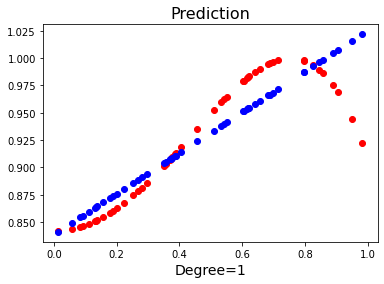

In [8]:
deg1 = 1
X1 = getPoweredX(deg1, X_train)

first_part = np.linalg.inv(np.dot(X1.transpose(), X1))
second_part = np.dot(first_part, X1.transpose())
W1 = np.dot(second_part, Y)

print("Empirical risk for degree 1 model: ", calculateEmpricalRisk(np.dot(X1, W1)))
plt.title("Prediction", size = "16")
plt.xlabel("Degree=1", size = "14")
plt.scatter(X,Y, color = "red")
plt.scatter(X1[:,1], np.dot(X1, W1), color = "blue")
plt.show()

Applying Polynomial Regression for degree 2 and printing its corresponding error and plot

Empirical risk for degree 2 model:  [0.00028552]


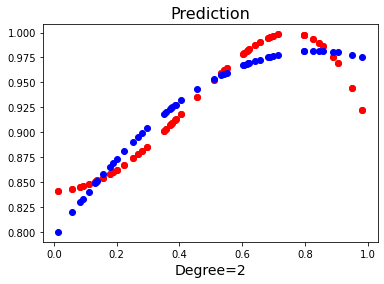

In [9]:
deg2 = 2
X2 = getPoweredX(deg2, X_train)

first_part = np.linalg.pinv(np.dot(X2.transpose(), X2))
second_part = np.dot(first_part, X2.transpose())
W2 = np.dot(second_part, Y)

print("Empirical risk for degree 2 model: ", calculateEmpricalRisk(np.dot(X2, W2)))
plt.title("Prediction", size = "16")
plt.xlabel("Degree=2", size = "14")
plt.scatter(X,Y, color = "red")
plt.scatter(X,Y, color = "red")
plt.scatter(X2[:,1], np.dot(X2, W2), color = "blue")
plt.show()

Applying Polynomial Regression for degree 3 and printing its corresponding error and plot

Empirical risk for degree 3 model:  [4.909399e-06]


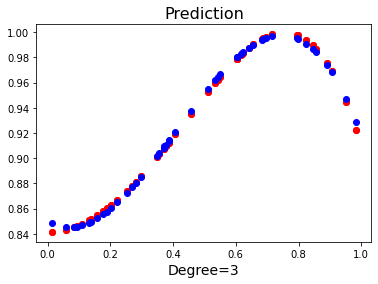

In [10]:
deg3 = 3
X3 = getPoweredX(deg3, X_train)

first_part = np.linalg.pinv(np.dot(X3.transpose(), X3))
second_part = np.dot(first_part, X3.transpose())
W3 = np.dot(second_part, Y)

print("Empirical risk for degree 3 model: ", calculateEmpricalRisk(np.dot(X3, W3)))
plt.title("Prediction", size = "16")
plt.xlabel("Degree=3", size = "14")
plt.scatter(X,Y, color = "red")
plt.scatter(X,Y, color = "red")
plt.scatter(X3[:,1], np.dot(X3, W3), color = "blue")
plt.show()

Applying Polynomial Regression for degree 4 and printing its corresponding error and plot

Empirical risk for degree 4 model:  [8.75599542e-09]


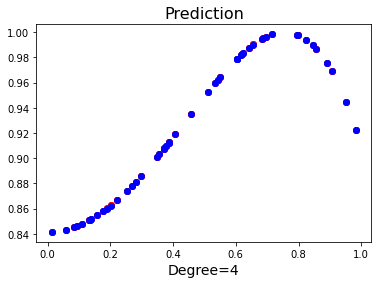

In [11]:
deg4 = 4
X4 = getPoweredX(deg4, X_train)

first_part = np.linalg.pinv(np.dot(X4.transpose(), X4))
second_part = np.dot(first_part, X4.transpose())
W4 = np.dot(second_part, Y)

print("Empirical risk for degree 4 model: ", calculateEmpricalRisk(np.dot(X4, W4)))
plt.title("Prediction", size = "16")
plt.xlabel("Degree=4", size = "14")
plt.scatter(X,Y, color = "red")
plt.scatter(X,Y, color = "red")
plt.scatter(X4[:,1],np.dot(X4,W4), color = "blue")
plt.show()